<a href="https://colab.research.google.com/github/oshvil2020/Stock-Market-Microsoft-vs-Apple/blob/main/Apple_vs_Microsft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

We will be using Apple and Microsoft stock data from Yahoo-Financial and will be checking *how they shows their behavior for* buying opportunities.



# import libraries and read files

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Address=''
df_APPEL= pd.read_csv(Address+'AAPL.csv')
df_MICRO = pd.read_csv(Address+'MSFT.csv')

In [4]:
APPEL= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exercise/Financial analysis/AAPL.csv')
MICRO = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exercise/Financial analysis/MSFT.csv')

# Split Date by Year

In [5]:
APPEL['Year']=pd.to_datetime(APPEL['Date'], format='%Y-%m-%d').dt.year
MICRO['Year']=pd.to_datetime(MICRO['Date'], format='%Y-%m-%d').dt.year

In [6]:
dfAPL_y=APPEL.groupby(['Year']).agg([np.mean, np.std])
dfAPL_y.reset_index(inplace=True)
dfMS_y=MICRO.groupby(['Year']).agg([np.mean, np.std])
dfMS_y.reset_index(inplace=True)


## figures

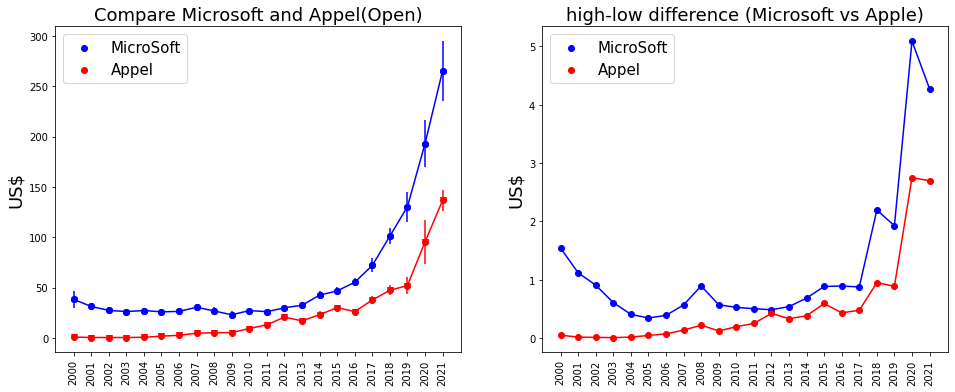

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,6))
ax1,ax2=ax

ax1.scatter(dfMS_y['Year'] , dfMS_y['Open']['mean'] , label ='MicroSoft' , color = 'b')
ax1.scatter(dfAPL_y['Year'] , dfAPL_y['Open']['mean'] , label = 'Appel' , color = 'r')
ax1.set_title('Compare Microsoft and Appel(Open)' , fontsize = 18)

ax1.errorbar(dfMS_y['Year'] , dfMS_y['Open']['mean'] , dfMS_y['Open']['std'] , marker ='o' , color = 'b' )
ax1.errorbar(dfAPL_y['Year'] , dfAPL_y['Open']['mean'] , dfAPL_y['Open']['std'] , marker='v' , color = 'r' )


ax2.scatter(dfMS_y['Year'] , dfMS_y['High']['mean'] - dfMS_y['Low']['mean'] , color = 'b' , label ='MicroSoft' , )
ax2.plot(dfMS_y['Year'] , dfMS_y['High']['mean'] - dfMS_y['Low']['mean'] , color = 'b')

ax2.scatter(dfAPL_y['Year'] , dfAPL_y['High']['mean'] - dfAPL_y['Low']['mean'] , color = 'r' , label = 'Appel')
ax2.plot(dfAPL_y['Year'] , dfAPL_y['High']['mean'] - dfAPL_y['Low']['mean'] , color = 'r')

ax2.set_title('high-low difference (Microsoft vs Apple)' , fontsize=18)

for axis in ax:
  axis.legend(fontsize = 15)
  axis.set_ylabel('US$' , fontsize = 18)
  axis.set_xticks(dfMS_y['Year'])
  axis.set_xticklabels(dfMS_y['Year'] , rotation = 90)


# Split Date by Month

In [10]:
APPEL['Month']=pd.to_datetime(APPEL['Date'], format='%Y-%m-%d').dt.month
MICRO['Month']=pd.to_datetime(MICRO['Date'], format='%Y-%m-%d').dt.month

In [11]:
dfAPL_m=APPEL.groupby(['Month']).agg([np.mean, np.std])
dfAPL_m.reset_index(inplace=True)
dfMS_m=MICRO.groupby(['Month']).agg([np.mean, np.std])
dfMS_m.reset_index(inplace=True)

## figures

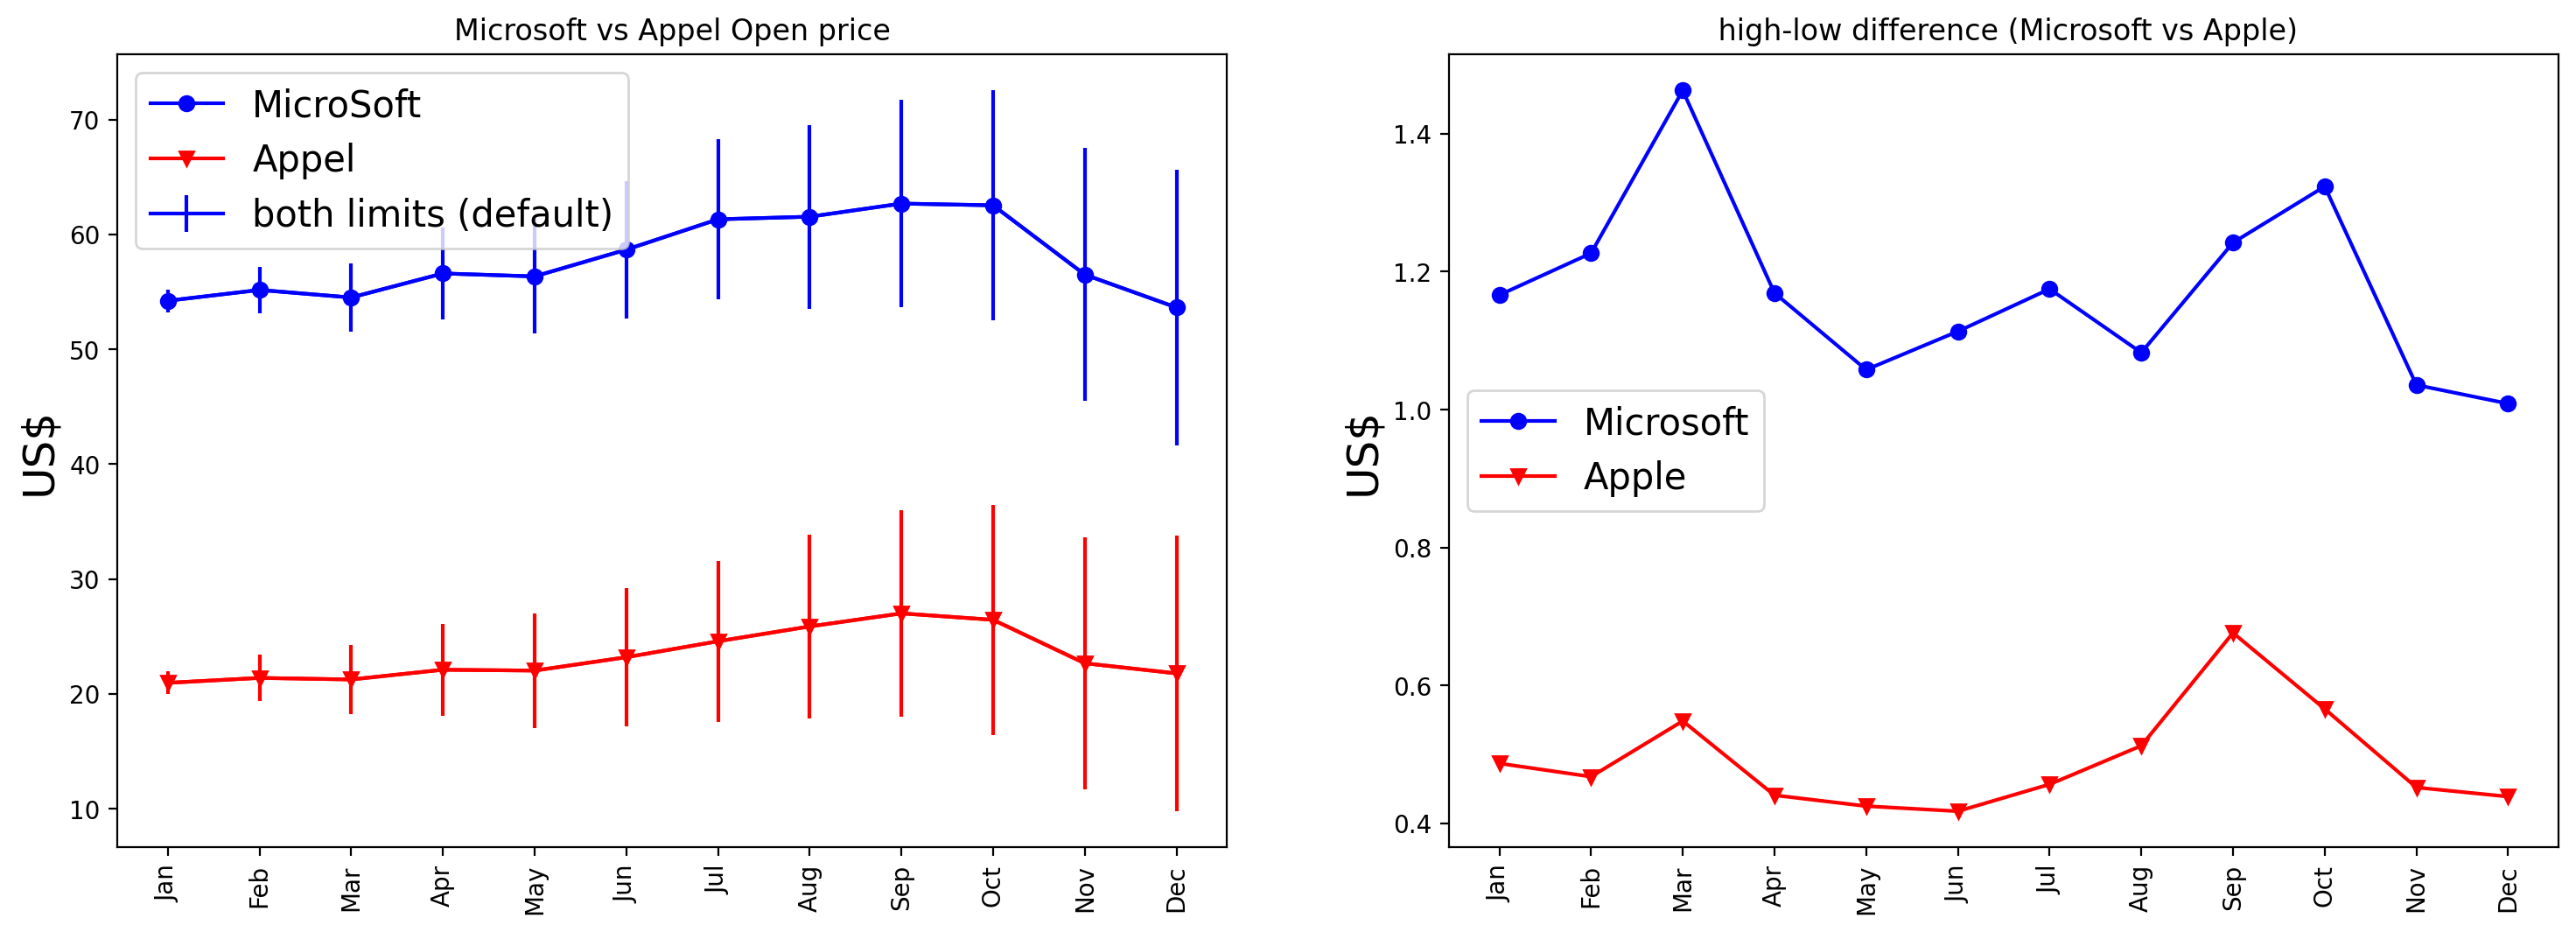

In [12]:
ticklab=['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']


fig, ax = plt.subplots( nrows=1 , ncols=2 , figsize=(18 , 6) , dpi = 200)
ax1,ax3 = ax

ax1.plot(dfMS_m['Month'] , dfMS_m['Open']['mean'] , label='MicroSoft' , marker='o' , color = 'b')
ax1.errorbar(dfMS_m['Month'] , dfMS_m['Open']['mean'] , yerr = dfMS_m['Month'] , label='both limits (default)' , color = 'b')
ax1.plot(dfAPL_m['Month'] , dfAPL_m['Open']['mean'] , label='Appel' , marker='v' , color = 'r')
ax1.errorbar(dfAPL_m['Month'] , dfAPL_m['Open']['mean'] , yerr = dfAPL_m['Month'] , color = 'r')

ax1.set_title('Microsoft vs Appel Open price')


ax3.plot(dfMS_m['Month'] , dfMS_m['High']['mean'] - dfMS_m['Low']['mean'] , label= 'Microsoft' , marker='o' ,  color= 'b')
ax3.plot(dfAPL_m['Month'] , dfAPL_m['High']['mean'] -  dfAPL_m['Low']['mean'] , label = 'Apple' , marker ='v' , color = 'r')

ax3.set_title(' high-low difference (Microsoft vs Apple)')


for axis in ax:
  axis.legend(fontsize = 15)
  axis.set_ylabel('US$' , fontsize = 18)
  axis.set_xticks(np.arange(1,13,1))
  axis.set_xticklabels(ticklab ,rotation=90)
  